# Objective

# Experiment 1

Followed the procedure:
 
 - For each verse in each target language, found difference with number of words in source(hindi) 
 - Filtered verses having *words count difference* > 15
 - Found **levenshtein ratio** and **cosine similarity** between each target verse and sourse verse
 - Verses having edit ratio < 0.35 and cosine similarity score< 0.1 are considered as wrong alignments. Flagged them as wrong alignment in each target file.
 - Threshold values are selected after analysing verses in few books





## Code

### Import

In [10]:
import os
import gc
import re
import string
import shutil
import traceback
import Levenshtein
import pandas as pd
import numpy as np
# %matplotlib notebook
# %matplotlib notebook
import matplotlib.pyplot as plt
from pathlib import Path 
from datetime import datetime
from collections import Counter, defaultdict, OrderedDict
from concurrent.futures import ProcessPoolExecutor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

### Clean text 

In [2]:
''' Cleaning a string '''

def clean_text(text):
    text = re.sub('[“”]', '"', text)
    text = re.sub('[‘’]', "'", text)
    text = re.sub('।', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\s\s+', ' ', text)
    return text.strip()

### Cosine similarity check 

In [3]:
''' Finds cosine similarity between to strings '''

def find_cosine_similarity(string1, string2):
    try:
        string1 = clean_text(string1)
        string2 = clean_text(string2)
        vectorizer = CountVectorizer().fit_transform([string1, string2])
        vectors = vectorizer.toarray()
        vec1 = vectors[0].reshape(1, -1)
        vec2 = vectors[1].reshape(1, -1)
        return cosine_similarity(vec1, vec2)[0][0]
    except Exception as e:
        print(e)  
        traceback.print_exc()

In [30]:
print("\n..................... Post checking the alignments ......................\n")
cwd = os.getcwd()
corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
for book in sorted(os.listdir(corpora_path)):
    print("\n************************ Book : ",book, '****************************\n')
    for min_lang in os.listdir(corpora_path + book):
        print("\n\nmin_lang :: ",min_lang + '\n\n')
        lang_name = min_lang.split('_')[0]
        source_file = book + '_hindi.txt'
        target_file = book + '_' + lang_name + '.txt'
        source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
        target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
        post_file = book + '_' + lang_name + '_checked.txt'
        if len(source_lines) != len(target_lines):
            # print("Mismatch in number of lines.........")
            break
        data = ''   
        for index,s_line in enumerate(source_lines):
            s_line = s_line.split('\t')[-1]
            t_line = (target_lines[index]).split('\t')[-1]
            
            '''calculates difference in number of words'''
            words_diff  = abs(len(s_line.split()) - len(t_line.split()))
            
            if words_diff > 15:
                ''' filtered verses having high difference by seting threshold 15. 
                    calculates edit ratio and cosine similarity score '''
                edit_ratio = round(Levenshtein.ratio(s_line,t_line), 2)
                cosine_score = round(find_cosine_similarity(s_line,t_line), 2)

                if cosine_score < 0.1 and edit_ratio < 0.35:
                    ''' Filtered wrong alignments by seting threshold values for cosine score
                        and edit ratio '''
#                     print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t','WRONG ALIGNMENT\n')
                    data += (target_lines[index]).strip() + '\t' + 'WRONG ALIGNMENT' + '\n'
                else:
#                     print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t', 'CORRECT ALIGNMENT\n')
                    data += target_lines[index]     
            else:
                data += target_lines[index]        
        fp = open(corpora_path + book + '/' + min_lang + '/' + post_file, 'w')    
        fp.write(data)
        fp.close()


..................... Post checking the alignments ......................


************************ Book :  40_MAT ****************************



min_lang ::  Haryanvi_BGCNT




min_lang ::  Dogri_DGONT




min_lang ::  Pahari Mahasui_BFZNT




min_lang ::  Mandeali_MJLNT




min_lang ::  Baghlayani_BGHNT




min_lang ::  Chambeali_CDHNT




min_lang ::  Kulvi Outer Seraji_OSJNT




min_lang ::  Gaddi_GBKNT




min_lang ::  Bhadrawahi_BHDNT




min_lang ::  Bilaspuri_KFSNT




min_lang ::  Kulvi_KFXNT




min_lang ::  Kangri_XNRNT



************************ Book :  41_MRK ****************************



min_lang ::  Haryanvi_BGCNT




min_lang ::  Dogri_DGONT




min_lang ::  Pahari Mahasui_BFZNT




min_lang ::  Mandeali_MJLNT




min_lang ::  Baghlayani_BGHNT




min_lang ::  Chambeali_CDHNT




min_lang ::  Kulvi Outer Seraji_OSJNT




min_lang ::  Gaddi_GBKNT




min_lang ::  Bhadrawahi_BHDNT




min_lang ::  Bilaspuri_KFSNT




min_lang ::  Kulvi_KFXNT




min_lang ::  Kangri_



min_lang ::  Baghlayani_BGHNT




min_lang ::  Chambeali_CDHNT




min_lang ::  Kulvi Outer Seraji_OSJNT




min_lang ::  Gaddi_GBKNT




min_lang ::  Bhadrawahi_BHDNT




min_lang ::  Bilaspuri_KFSNT




min_lang ::  Kulvi_KFXNT




min_lang ::  Kangri_XNRNT



************************ Book :  59_JAS ****************************



min_lang ::  Haryanvi_BGCNT




min_lang ::  Dogri_DGONT




min_lang ::  Pahari Mahasui_BFZNT




min_lang ::  Mandeali_MJLNT




min_lang ::  Baghlayani_BGHNT




min_lang ::  Chambeali_CDHNT




min_lang ::  Kulvi Outer Seraji_OSJNT




min_lang ::  Gaddi_GBKNT




min_lang ::  Bhadrawahi_BHDNT




min_lang ::  Bilaspuri_KFSNT




min_lang ::  Kulvi_KFXNT




min_lang ::  Kangri_XNRNT



************************ Book :  60_1PE ****************************



min_lang ::  Haryanvi_BGCNT




min_lang ::  Dogri_DGONT




min_lang ::  Pahari Mahasui_BFZNT




min_lang ::  Mandeali_MJLNT




min_lang ::  Baghlayani_BGHNT




min_lang ::  Chambeali_CDHNT





## Analyzis

 - Among wrong alignments there are correct ones which couldn't picked up
 - The threshold value 15 for words_count_diff is set as common for all 12 languages. Need to closely check how its distributed among different languages. In some language after translation text may becom too long compared to source.
 - Need to check this by plotting graphs
 - Didn't applied any data preprocessing. Similarity measures can be improved by cleaning data
 - Found text segments within parenthesis in source, and in target, content is missing. This   segments can be cleaned from source.
 - Cleaning punctuations will be helpful

# Experiment 2

Followed the procedure:

 - Applied data cleaning before processing data
    - Removed text segments within paranthesis (if segments is there either in source/target)
    - Removed punctuations
 - Followed the same procedure in experiment 1 on cleanedverses and filetered wrongly aligned verses
 - To analyze the characteristics of words_count_diff for each target language, plotted graph.(the x-axis as words_count_diff values(0, ..10,..25 etc) and y-axis as the number of words_count_diff(200..., 1000..etc ).)

## Code 

### Plot graph 

In [24]:
def analyze_words_diff(words_diff_dic):
    print("\n........ Analyzing word differences .........\n")
    fig, ax = plt.subplots(2)
    fig_num = 0
    i = 0
    for index,lang in enumerate(words_diff_dic.keys()):
        print(lang)
        diff_freq = Counter(words_diff_dic[lang])
        print(diff_freq)
        ax[i].plot(list(diff_freq.keys()), list(diff_freq.values()), 'ro')
        ax[i].set_title(lang)
        i += 1                
        if index % 2 == 1:
#             im_path = str(Path(os.getcwd()).parent) + '/images/' 
            plt.show()
#             plt.savefig(im_path+'words_diff_'+ str(fig_num) +'.png', dpi=300)    
            plt.clf()
            fig, ax = plt.subplots(2)
            fig_num += 1
            i = 0

In [10]:
# def clean_data():    
#     print("\n........ Cleaning data .........\n")
#     for book in sorted(os.listdir(corpora_path)):
#         for min_lang in os.listdir(corpora_path + book):
#             lang_name = min_lang.split('_')[0]
#             source_file = book + '_hindi.txt'
#             target_file = book + '_' + lang_name + '.txt'
#             target_file_cleaned = book + '_' + lang_name + '_cleaned.txt'
#             source_file_cleaned = book + '_hindi_cleaned.txt'
#             source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
#             target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
#             if len(source_lines) != len(target_lines):
#                 print("Mismatch in number of lines.........")
#                 break
#             source_data = ''
#             target_data = ''    
#             for index,line in enumerate(source_lines):
#                 s_flag = 0
#                 t_flag = 0
#                 t_line = target_lines[index]
#                 s_text = (line.split('\t')[-1]).strip()
#                 t_text = (t_line.split('\t')[-1]).strip()
#                 # if re.search('\(.*\)',line):
#                 #     s_flag = 1
#                 # if re.search('\(.*\)',t_line):
#                 #     t_flag = 1
#                 # if s_flag == 1 and t_flag == 1:
#                 #     if re.search('^[\(\[].*[\)\]]$', s_text.strip()):
#                 #         line = re.sub('[\(\[\)\]]', '', line)
#                 #     else:
#                 #         line = re.sub('[\(\[].*[\)\]]','',line)        
#                 #     if re.search('^[\(\[].*[\)\]]$', t_text.strip()):
#                 #         t_line = re.sub('[\(\[\)\]]', '', t_line)
#                 #     else:
#                 #         t_line = re.sub('[\(\[].*[\)\]]','',t_line)            
#                 # else:
#                 #     line = re.sub('[\(\[].*[\)\]]','',line)    
#                 #     t_line = re.sub('[\(\[].*[\)\]]','',t_line)    
#                 line = clean_text(line)        
#                 t_line = clean_text(t_line)
#                 source_data += line + '\n'
#                 target_data    += t_line + '\n'                    
#             fp = open(corpora_path + book + '/' + min_lang + '/' + source_file_cleaned, 'w')    
#             fp.write(source_data)
#             fp.close()
#             fp_t = open(corpora_path + book + '/' + min_lang + '/' + target_file_cleaned, 'w')    
#             fp_t.write(target_data)
#             fp_t.close()


..................... Post checking the alignments ......................


......... Processing corpora ..........


************************ Book :  40_MAT ****************************



min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Mandeali_MJLNT
20 	 0.27 	 0.0 	 20	7	उसने उनसे कहा, ‘तुम भी दाख की बारी में जाओ।’ 	 20	7	तिन्हें माल्का किन्हें बोल्या, क्यूंकि आस्सा जो केसिए मजदूरी पर नी ल्गाया। अंगूरा रे बगीचे रे माल्के तिन्हा किन्हें बोल्या, ‘तुस्से भी अंगूरा रे बगीचे मन्झ जाई किन्हें काम करा।’” 	 WRONG ALIGNMENT



min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT
18 	 0.28 	 0.0 	 24	28	”जहाँ लोथ हो, वहीं गिद्ध इकट्ठे होंगे। 	 24	28	जित्ते लाश हो, सारे लोक्कां जो ए इय्यां पता लगी जाणा कि ए कुते होणा जिय्यां कि इल्लणां रे कठीणे पर लाश रा पता चलदा। 	 WRONG ALIGNMENT

16 	 0.29 	 0.0 	 25	46	”और यह अनन्‍त दण्‍ड भोगेंगे परन्‍तु धर्मी अनन्‍त जीवन में प्रवेश करेंगे।” 	 25	46	ते तिन्हा पुठ्ठे पास्से वाले बुरे लोक्क

22 	 0.27 	 0.0 	 9	31	पर यह बात उनकी समझ में नहीं आई, और वे उससे पूछने से डरते थे। 	 9	31	काँह्भई सै अपणयां चेलयां जो उपदेश देई कराँ था। यीशुये तिन्हांजो बोल्या, “माहणुये रे पुत्रा यनि मिन्जो माहणुआं रे हात्था च पकड़वाया जाणा, कने तिन्हां मिन्जो मारी देणा; कने मांह मरने ते तिन्नां दिना बाद जी उठणा।” 	 WRONG ALIGNMENT

17 	 0.29 	 0.05 	 10	8	‘और वे दोनों एक तन होंगे’; इसलिये वे अब दो नहीं, पर एक तन हैं। 	 10	8	कने तिन्हां दुईं इक्की शरीरा साई जुड़ी रयां रैहणा; हलांकि ब्याह ते पैहले सै दो शरीर थे, पर परमेशर हुण तिन्हांजो इक्की शरीरा साई देक्खां इस खातर सै चाँह दोन्नों मिलीने रौ। 	 WRONG ALIGNMENT

19 	 0.29 	 0.06 	 10	31	पर बहुतेरे जो पहले हैं, पिछले होंगे; और जो पिछले हैं, वे पहले होंगे।” 	 10	31	पर हऊँ तुहां सब्बीं जो खबरदार कराँ; तुहां चते सै जे कोई अप्पूँजो बड़ा खास बणांगा, तिस खास नीं समझया जाणा; कने सै जे अप्पूँजो बड़ा खास नीं बणांगा तिसजो खास समझया जाणा।” 	 WRONG ALIGNMENT

17 	 0.28 	 0.0 	 12	39	और आराधनालयों में मुख्‍य मुख्‍य आसन और भोज में मुख्‍य मुख्‍य स्‍थान भी चाहते हैं।



min_lang ::  Bhadrawahi_BHDNT
22 	 0.25 	 0.0 	 12	20	परन्‍तु “यदि तेरा बैरी भूखा हो तो उसे खाना खिला, यदि प्‍यासा हो, तो उसे पानी पिला; क्‍योकि ऐसा करने से तू उसके सिर पर आग के अंगारों का ढेर लगाएगा।” 	 12	21	बुरैई करां न हारा पन बुराई भलैई सेइं ज़ींतां। 	 WRONG ALIGNMENT

17 	 0.26 	 0.0 	 14	16	अब तुम्‍हारी भलाई की निन्‍दा न होने पाए। 	 14	17	किजोकि परमेशरेरे राज़्ज़े मां खानू पीनू माईने न रख्खे; माईने रखते धार्मिकतारी ज़िन्दगी ज़ींनी ते मेल मलाप, ते आनन्द तै आए ज़ै पवित्र आत्मा देते। 	 WRONG ALIGNMENT

29 	 0.28 	 0.0 	 15	24	इसलिये जब इसपानिया को जाऊँगा तो तुम्‍हारे पास होता हुआ जाऊँगा क्‍योंकि मुझे आशा है, कि उस यात्रा में तुम से भेंट करूँ, और जब तुम्‍हारी संगति से मेरा जी कुछ भर जाए, तो तुम मुझे कुछ दूर आगे पहुँचा दो। 	 15	25	पन हुनी त परमेशरेरे लोकां केरि सेवा केरनेरे लेइ यरूशलेम नगरे गाताईं। 	 WRONG ALIGNMENT



min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT
24 	 0.28 	 0.0 	 15	22	इसी लिये मैं तुम्‍हारे पास आने से बार बार रूका रहा। 	 15	22	किबैकि मैं तिन्हां ज़ैगा पैं



min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT
31 	 0.28 	 0.05 	 1	14	वह उसके मोल लिए हुओं के छुटकारे के लिये हमारी मीरास का बयाना है, कि उसकी महिमा की स्‍तुति हो। 	 1	14	किल्हैकि परमेशरै आसा हाम्हां लै पबित्र आत्मां दैनी दी, तेता करै हआ हाम्हां निहंचअ कि तेऊ दैणीं हाम्हां लै तिंयां भली गल्ला ज़ेतो तेऊ हाम्हां लै बाहिदअ आसा किअ द। सह हणअ तेभै ज़ेभै परमेशर हाम्हां पठी निंए बच़ाऊई ज़ुंण हाम्हैं तेऊए आपणैं लोग आसा, एता लै करनी हाम्हां परमेशरे महिमां। 	 WRONG ALIGNMENT



min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT


min_lang ::  Kangri_XNRNT

************************ Book :  50_PHP ****************************



min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Mandeali_MJLNT


min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


m



min_lang ::  Chambeali_CDHNT
45 	 0.28 	 0.08 	 1	10	क्‍योंकि बहुत से लोग निरंकुश बकवादी और धोखा देनेवाले हैं; विशेष करके खतनावालों में से। 	 1	10	मै ए इधेरे तांइ बोल्लेया करदा है किजोकी मते लोक सही शिक्षा रे खिलाफ होई जांदे। ए से लोक हिन जे पुठ्ठी-सिद्दी गल्लां सिखाई करी लोक्कां जो भटकांदे। ए गल्लां खासतौर तिन्हा यहुदियां तांइ हिन जे विश्वासी बणी गे रे हिन। से लोक चाह्‍ंदे कि सारे मसीही लोक यहुदी नियमां जो मन्नेया करें, खासतौर पर खतना कराणे रे नियम जो। 	 WRONG ALIGNMENT



min_lang ::  Kulvi Outer Seraji_OSJNT
31 	 0.25 	 0.06 	 2	15	पूरे अधिकार के साथ ये बातें कह और समझा और सिखाता रह: कोई तुझे तुच्छ न जानने पाए। 	 2	15	तिमुतुस, हुंह च़ाहा इहअ कि तूह तिधी क्रेतै रहणैं आल़ै विश्वासी लै इना गल्ला सखाओए ज़ुंण मंऐं ताखा खोज़ी। आपणैं लोगा लै दै इना गल्ला करना लै हैअ, ज़िधी ज़रूरी आसा तिधी समझ़ाऊ तिन्नां। ताह आसा इहअ करनैओ हक। एसा गल्लो डाहै धैन कि सोभी लोल़ी तेरअ अदर किअ। 	 WRONG ALIGNMENT



min_lang ::  Gaddi_GBKNT
32 	 0.29 	 0.08 	 1	10	क्‍योंकि बहुत से लोग निरंकुश बकवादी और धोखा देन



min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT


min_lang ::  Kangri_XNRNT

************************ Book :  63_2JN ****************************



min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT


min_lang ::  Mandeali_MJLNT


min_lang ::  Baghlayani_BGHNT


min_lang ::  Chambeali_CDHNT


min_lang ::  Kulvi Outer Seraji_OSJNT


min_lang ::  Gaddi_GBKNT


min_lang ::  Bhadrawahi_BHDNT


min_lang ::  Bilaspuri_KFSNT


min_lang ::  Kulvi_KFXNT


min_lang ::  Kangri_XNRNT

************************ Book :  64_3JN ****************************



min_lang ::  Haryanvi_BGCNT


min_lang ::  Dogri_DGONT


min_lang ::  Pahari Mahasui_BFZNT
20 	 0.28 	 0.0 	 1	14	पर मुझे आशा है कि तुझ से शीघ्र भेंट करूँगा: तब हम आमने - सामने बातचीत करेंगे: तुझे शान्‍ति मिलती रहे। यहाँ के मित्र तुझे नमस्‍कार करते हैं: वहाँ के मित्रों

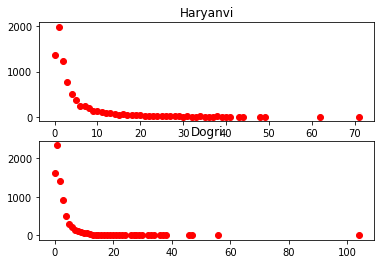

Pahari Mahasui
Counter({1: 1725, 2: 1344, 3: 992, 0: 970, 4: 706, 5: 507, 6: 362, 7: 281, 8: 229, 9: 155, 10: 133, 11: 91, 12: 74, 13: 59, 14: 58, 15: 46, 16: 44, 17: 26, 18: 22, 19: 16, 20: 15, 21: 15, 22: 13, 25: 8, 23: 7, 27: 7, 28: 6, 30: 4, 24: 4, 32: 3, 31: 3, 34: 3, 29: 3, 35: 1, 26: 1, 33: 1, 41: 1, 38: 1, 45: 1})
Mandeali
Counter({1: 1050, 2: 882, 3: 816, 4: 692, 0: 555, 5: 519, 6: 499, 7: 413, 8: 336, 9: 257, 10: 222, 11: 214, 12: 193, 13: 160, 14: 148, 15: 124, 16: 98, 17: 96, 18: 85, 20: 75, 19: 68, 22: 48, 21: 47, 24: 41, 23: 41, 25: 22, 26: 19, 29: 19, 27: 18, 28: 16, 31: 16, 30: 13, 34: 13, 32: 12, 33: 9, 38: 8, 36: 7, 35: 6, 37: 5, 46: 4, 40: 4, 43: 3, 41: 3, 47: 3, 42: 2, 60: 1, 48: 1, 57: 1, 54: 1, 59: 1, 49: 1, 66: 1, 71: 1, 45: 1, 53: 1, 56: 1, 44: 1})


<Figure size 432x288 with 0 Axes>

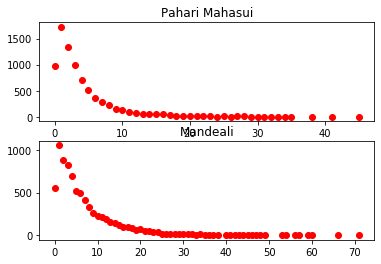

Baghlayani
Counter({1: 1917, 2: 1460, 0: 1111, 3: 1009, 4: 676, 5: 443, 6: 280, 7: 214, 8: 169, 10: 125, 9: 114, 11: 73, 12: 60, 14: 53, 13: 42, 16: 29, 15: 27, 17: 26, 18: 25, 21: 18, 19: 14, 20: 10, 23: 9, 22: 8, 24: 7, 26: 5, 32: 4, 27: 4, 28: 3, 29: 3, 25: 2, 49: 1, 33: 1, 47: 1, 31: 1, 38: 1, 30: 1, 41: 1, 52: 1, 34: 1, 42: 1, 36: 1})
Chambeali
Counter({1: 1051, 2: 922, 3: 751, 4: 594, 5: 578, 0: 574, 6: 487, 7: 396, 8: 335, 9: 278, 10: 249, 11: 218, 12: 182, 13: 168, 14: 139, 15: 118, 17: 100, 16: 99, 18: 97, 19: 77, 20: 59, 21: 42, 22: 41, 26: 40, 23: 33, 24: 29, 29: 24, 28: 20, 25: 20, 27: 17, 30: 17, 33: 13, 32: 12, 31: 11, 41: 9, 36: 9, 38: 8, 37: 8, 35: 6, 40: 6, 34: 5, 39: 4, 43: 4, 47: 3, 54: 3, 46: 3, 44: 2, 42: 2, 45: 2, 59: 1, 53: 1, 50: 1, 78: 1, 94: 1, 49: 1, 87: 1, 68: 1, 58: 1, 48: 1, 64: 1})


<Figure size 432x288 with 0 Axes>

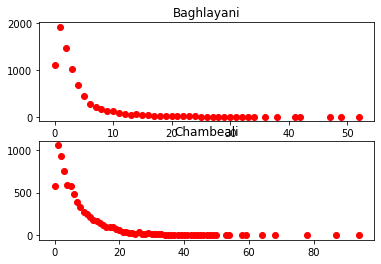

Kulvi Outer Seraji
Counter({1: 1268, 2: 1204, 3: 932, 4: 733, 0: 686, 5: 601, 6: 452, 7: 342, 8: 294, 9: 241, 10: 171, 11: 141, 12: 125, 13: 109, 14: 90, 15: 81, 16: 51, 17: 50, 19: 43, 18: 42, 20: 34, 23: 27, 24: 25, 21: 19, 22: 18, 26: 15, 28: 15, 29: 13, 25: 12, 27: 11, 30: 10, 31: 10, 33: 9, 35: 7, 32: 6, 34: 6, 38: 4, 52: 3, 45: 2, 42: 2, 51: 2, 37: 2, 39: 2, 44: 2, 40: 2, 56: 2, 47: 1, 36: 1, 49: 1, 46: 1, 41: 1})
Gaddi
Counter({1: 1834, 2: 1417, 0: 1048, 3: 894, 4: 624, 5: 520, 6: 323, 8: 212, 7: 210, 9: 175, 10: 121, 11: 93, 12: 78, 13: 73, 14: 51, 15: 41, 16: 34, 17: 30, 19: 23, 18: 22, 20: 20, 21: 19, 24: 13, 23: 12, 25: 11, 22: 11, 29: 7, 26: 6, 32: 6, 27: 5, 30: 4, 28: 4, 33: 2, 37: 2, 42: 2, 39: 1, 49: 1, 36: 1, 44: 1, 31: 1, 56: 1})


<Figure size 432x288 with 0 Axes>

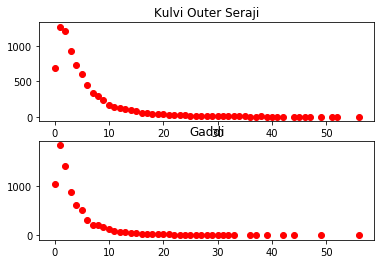

Bhadrawahi
Counter({1: 1386, 2: 1256, 3: 1017, 4: 869, 0: 703, 5: 660, 6: 464, 7: 367, 8: 265, 9: 221, 10: 141, 12: 98, 11: 89, 13: 77, 14: 62, 15: 49, 18: 27, 17: 27, 16: 26, 19: 23, 21: 18, 22: 13, 23: 11, 20: 10, 29: 9, 25: 9, 24: 6, 28: 4, 27: 4, 26: 4, 32: 4, 30: 2, 37: 2, 34: 2, 35: 2, 36: 2, 33: 2, 44: 2, 40: 1, 42: 1, 31: 1})
Bilaspuri
Counter({1: 1574, 2: 1190, 3: 942, 0: 881, 4: 665, 5: 556, 6: 409, 7: 314, 8: 264, 9: 185, 10: 172, 11: 125, 12: 122, 13: 85, 14: 73, 16: 67, 15: 56, 17: 47, 18: 42, 19: 33, 22: 21, 21: 20, 20: 18, 29: 9, 26: 9, 25: 9, 23: 8, 31: 6, 24: 6, 27: 5, 34: 4, 28: 4, 33: 3, 30: 2, 37: 2, 32: 2, 43: 1, 44: 1, 47: 1, 42: 1, 41: 1, 53: 1})


<Figure size 432x288 with 0 Axes>

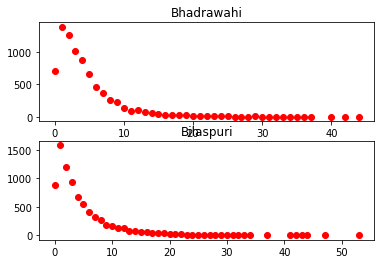

Kulvi
Counter({1: 1662, 2: 1313, 0: 987, 3: 926, 4: 705, 5: 487, 6: 414, 7: 285, 8: 190, 9: 183, 10: 133, 11: 108, 12: 90, 13: 67, 14: 58, 15: 48, 17: 39, 16: 39, 18: 35, 20: 24, 19: 20, 21: 17, 22: 10, 25: 10, 24: 10, 23: 8, 26: 8, 30: 7, 29: 6, 27: 6, 28: 5, 31: 3, 39: 3, 36: 3, 34: 3, 46: 3, 37: 1, 40: 1, 41: 1, 73: 1, 33: 1, 43: 1, 32: 1, 35: 1, 62: 1, 38: 1, 42: 1})
Kangri
Counter({1: 1677, 2: 1287, 0: 998, 3: 863, 4: 635, 5: 513, 6: 385, 7: 291, 8: 227, 9: 191, 10: 141, 11: 122, 12: 102, 13: 83, 14: 62, 15: 51, 16: 48, 17: 43, 18: 42, 21: 26, 20: 20, 24: 18, 19: 16, 22: 13, 23: 11, 26: 11, 27: 10, 30: 6, 28: 6, 29: 6, 25: 5, 34: 5, 32: 3, 31: 3, 36: 2, 47: 1, 43: 1, 35: 1, 39: 1, 40: 1, 54: 1, 37: 1, 45: 1, 33: 1, 46: 1, 38: 1})


<Figure size 432x288 with 0 Axes>

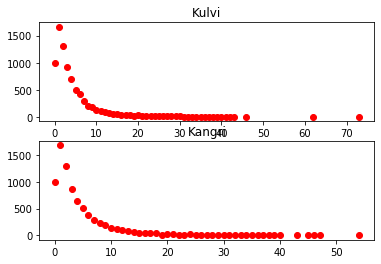

<Figure size 432x288 with 0 Axes>

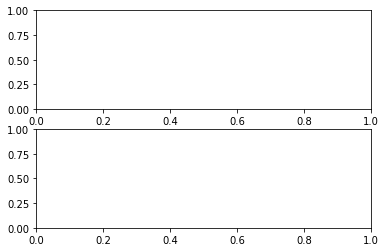

In [29]:
print("\n..................... Post checking the alignments ......................\n")
cwd = os.getcwd()
corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
print("\n......... Processing corpora ..........\n")
words_diff_dic = defaultdict(list)
for book in sorted(os.listdir(corpora_path)):
    print("\n************************ Book : ",book, '****************************\n')
    for min_lang in os.listdir(corpora_path + book):
        print("\n\nmin_lang :: ",min_lang)
        lang_name = min_lang.split('_')[0]
        source_file = book + '_hindi.txt'
        target_file = book + '_' + lang_name + '.txt'
        source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
        target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
        post_file = book + '_' + lang_name + '_checked.txt'
        if len(source_lines) != len(target_lines):
            # print("Mismatch in number of lines.........")
            break
        data = ''
        temp = []    
        for index,s_line in enumerate(source_lines):
            s_text = (s_line.split('\t')[-1]).strip()
            t_text = (target_lines[index].split('\t')[-1]).strip()
            s_line = clean_text(s_text)
            t_line = clean_text(t_text)
            words_diff  = abs(len(s_line.split()) - len(t_line.split()))
            temp.append(words_diff)
            if words_diff > 15:
#                 print("----------------------------------------------------------------------------------------")
                edit_ratio = round(Levenshtein.ratio(s_line,t_line), 2)
                cosine_score = round(find_cosine_similarity(s_line,t_line), 2)
#                 print("....", source_lines[index])
#                 print(">>>>", target_lines[index])
                if cosine_score < 0.1 and edit_ratio < 0.3:
                    print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t','WRONG ALIGNMENT\n')
                    data += (target_lines[index]).strip() + '\t' + 'WRONG ALIGNMENT' + '\n'
                else:
#                     print(words_diff, '\t',edit_ratio, '\t', cosine_score, '\t', source_lines[index].strip(), '\t', target_lines[index].strip(), '\t', 'CORRECT ALIGNMENT\n')
                    data += target_lines[index]     
            else:
                data += target_lines[index]        
        fp = open(corpora_path + book + '/' + min_lang + '/' + post_file, 'w')    
        fp.write(data)
        fp.close()
        if lang_name not in words_diff_dic:
            words_diff_dic[lang_name] = temp
        else:
            words_diff_dic[lang_name] += temp                    
analyze_words_diff(words_diff_dic)    

## Analyzis

 - After processing cleaned data the count of wrong alignments  increased. Found that if segments within paranthesis is there in source, its there in target as well without paranthesis. So its not good to clean them
 - Tried to clean punctuations alone, and count of wrong alignments decreased. So now cleaning punctuations only in data pre-processing.
 - Currently setting threshold value for words_count_diff common for all languages. But by analyzing the graph found that it varies with languages. 
 - Need to find threshold value for each language.

# Experiment 3 (With Berkeley aligner)

 - Filter verses that meets threshold value of count_diff (if threshold is 10 get verses having this difference <10)
 - Train word aligner using this collection of verses using Berkeley aligner
 - Get translation table from the aligner and apply that in the other set(verses having diff >10) and found the values to check the quality

## Code

### Preparing data 

 - Source and target files should have same filename with language code as extension. Eg: In
   case of hindi-bilaspuri parallel corpora source as filename.hi and target as filename.bi.
 - Taking verses that meet the threshold of corresponding target lang
 - To train a syntactic HMM alignment model, need a third parallel file for each training set pair that contains phrase structure trees.  The suffix of these files must be "{englishSuffix}trees" (e.g., etrees).

In [4]:
diff_thr = {"Mandeali" :10, "Haryanvi": 8, "Dogri": 7, "Pahari_Mahasui": 11, "Baghlayani": 8, "Chambeali": 7, "Kulvi_Outer_Seraji":10, "Gaddi":7, "Bhadrawahi": 10, "Bilaspuri": 10, "Kulvi": 8, "Kangri":8}
lang_code = {"Mandeali" :'ma', "Haryanvi": 'ha', "Dogri": 'do', "Pahari_Mahasui": 'pa', "Baghlayani": 'bg', "Chambeali": 'ch', "Kulvi_Outer_Seraji":'km', "Gaddi":'ga', "Bhadrawahi": 'bh', "Bilaspuri": 'bi', "Kulvi": 'ku', "Kangri":'ka'}

In [6]:
''' Filtering verses that meets the threshold value of word_count_diff'''

cwd = os.getcwd()
if 'word_aligner' not in os.listdir(cwd):
    os.mkdir(cwd+'/'+'word_aligner')
if 'data' not in os.listdir(cwd+'/word_aligner'):
    os.mkdir(cwd+'/word_aligner/data')
data_path = cwd+'/word_aligner/data/' 
corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
for book in sorted(os.listdir(corpora_path)):
    for min_lang in os.listdir(corpora_path + book):
        lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
        os.system("rm "+data_path + lang_name + "/*.txt")
        os.system("rm "+data_path + lang_name + "/verses.*")
# clean_data()
for book in sorted(os.listdir(corpora_path)):
    print("\n************************ Book : ",book, '****************************\n')
    for min_lang in os.listdir(corpora_path + book):
        print("\n\nmin_lang :: ",min_lang)
        lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
        print(lang_name)
        if min_lang not in os.listdir(data_path):
            os.mkdir(data_path + '/' + min_lang)
        data_lang_path = data_path + min_lang + '/'    
        source_file = book + '_hindi.txt'
        target_file = book + '_' + lang_name + '.txt'
        source_lines = open(corpora_path + book + '/' + min_lang + '/' + source_file, 'r').readlines()
        target_lines = open(corpora_path + book + '/' + min_lang + '/' + target_file, 'r').readlines()
        if len(source_lines) != len(target_lines):
            # print("Mismatch in number of lines.........")
            break
        data = '' 
        words_diff_thr = diff_thr[lang_name]
        s_lang_fp = open(data_lang_path + 'verses.hi', 'a')
        t_lang_fp = open(data_lang_path + 'verses.'+ lang_code[lang_name], 'a')
        s_lang_w_fp = open(data_lang_path + 'source_to_be_checked.txt', 'a')
        t_lang_w_fp = open(data_lang_path + 'target_to_be_checked.txt', 'a')
        for index, line in enumerate(source_lines):
            s_text = (line.split('\t')[-1]).strip()
            t_text = (target_lines[index].split('\t')[-1]).strip()
            s_line = clean_text(s_text)
            t_line = clean_text(t_text)
            words_diff  = abs(len(s_line.split()) - len(t_line.split()))
            if words_diff <= words_diff_thr:
                s_lang_fp.write(book + '\t'+ line)
                t_lang_fp.write(book + '\t'+ target_lines[index]) 
            else:
                s_lang_w_fp.write(book + '\t'+ line)
                t_lang_w_fp.write(book + '\t'+ target_lines[index])
        s_lang_fp.close()
        t_lang_fp.close()
        s_lang_w_fp.close()
        t_lang_w_fp.close()        


************************ Book :  40_MAT ****************************



min_lang ::  Haryanvi_BGCNT
Haryanvi


min_lang ::  Dogri_DGONT
Dogri


min_lang ::  Mandeali_MJLNT
Mandeali


min_lang ::  Baghlayani_BGHNT
Baghlayani


min_lang ::  Chambeali_CDHNT
Chambeali


min_lang ::  Gaddi_GBKNT
Gaddi


min_lang ::  Bhadrawahi_BHDNT
Bhadrawahi


min_lang ::  Bilaspuri_KFSNT
Bilaspuri


min_lang ::  Kulvi_Outer_Seraji_OSJNT
Kulvi_Outer_Seraji


min_lang ::  Kulvi_KFXNT
Kulvi


min_lang ::  Pahari_Mahasui_BFZNT
Pahari_Mahasui


min_lang ::  Kangri_XNRNT
Kangri

************************ Book :  41_MRK ****************************



min_lang ::  Haryanvi_BGCNT
Haryanvi


min_lang ::  Dogri_DGONT
Dogri


min_lang ::  Mandeali_MJLNT
Mandeali


min_lang ::  Baghlayani_BGHNT
Baghlayani


min_lang ::  Chambeali_CDHNT
Chambeali


min_lang ::  Gaddi_GBKNT
Gaddi


min_lang ::  Bhadrawahi_BHDNT
Bhadrawahi


min_lang ::  Bilaspuri_KFSNT
Bilaspuri


min_lang ::  Kulvi_Outer_Seraji_OSJNT
Kulvi_Outer_Sera



min_lang ::  Dogri_DGONT
Dogri


min_lang ::  Mandeali_MJLNT
Mandeali


min_lang ::  Baghlayani_BGHNT
Baghlayani


min_lang ::  Chambeali_CDHNT
Chambeali


min_lang ::  Gaddi_GBKNT
Gaddi


min_lang ::  Bhadrawahi_BHDNT
Bhadrawahi


min_lang ::  Bilaspuri_KFSNT
Bilaspuri


min_lang ::  Kulvi_Outer_Seraji_OSJNT
Kulvi_Outer_Seraji


min_lang ::  Kulvi_KFXNT
Kulvi


min_lang ::  Pahari_Mahasui_BFZNT
Pahari_Mahasui


min_lang ::  Kangri_XNRNT
Kangri

************************ Book :  58_HEB ****************************



min_lang ::  Haryanvi_BGCNT
Haryanvi


min_lang ::  Dogri_DGONT
Dogri


min_lang ::  Mandeali_MJLNT
Mandeali


min_lang ::  Baghlayani_BGHNT
Baghlayani


min_lang ::  Chambeali_CDHNT
Chambeali


min_lang ::  Gaddi_GBKNT
Gaddi


min_lang ::  Bhadrawahi_BHDNT
Bhadrawahi


min_lang ::  Bilaspuri_KFSNT
Bilaspuri


min_lang ::  Kulvi_Outer_Seraji_OSJNT
Kulvi_Outer_Seraji


min_lang ::  Kulvi_KFXNT
Kulvi


min_lang ::  Pahari_Mahasui_BFZNT
Pahari_Mahasui


min_lang ::  Kangri_X

### Splitting data 

 - Spliting source and target data into train and test in 8:2 ratio
 - In test files, verses are tagged with verse number as well (as per the sample format given by berkeley aligner)
 - Cleaning punctuations for training
 

In [38]:
cwd = os.getcwd()
data_path = cwd+'/word_aligner/data/'  
for min_lang in os.listdir(data_path):
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    print(lang_name, lang_code[lang_name])
    data_lang_path = data_path + min_lang + '/'
    s_data = open(data_lang_path + 'verses.hi', 'r').readlines()
    t_data = open(data_lang_path + 'verses.'+ lang_code[lang_name], 'r').readlines()
    if 'train' in os.listdir(data_lang_path):
        shutil.rmtree(data_lang_path + 'train')
    if 'test' in os.listdir(data_lang_path):
        shutil.rmtree(data_lang_path + 'test')
    os.mkdir(data_lang_path + 'train')
    os.mkdir(data_lang_path + 'test')
    s_train_fp = open(data_lang_path + '/train/verses.hi', 'w')
    t_train_fp = open(data_lang_path + '/train/verses.'+lang_code[lang_name], 'w')
    s_test_fp = open(data_lang_path + '/test/verses.hi', 'w')
    t_test_fp = open(data_lang_path + '/test/verses.' + lang_code[lang_name], 'w')
    split_val = int(len(s_data) * 0.8)
#     print(len(s_data), len(t_data), split_val)
    test_num = 0
    for index, s_line in enumerate(s_data):
        if index <= split_val:
            s_train_fp.write(clean_text(s_line.split('\t')[-1]) + '\n')
            t_train_fp.write(clean_text(t_data[index].split('\t')[-1]) + '\n')
        else:
            test_num += 1
            s_test_fp.write('<s snum='+ "{:04n}".format(test_num) +'> ' + clean_text(s_line.split('\t')[-1]) + ' </s>\n')
            t_test_fp.write('<s snum='+ "{:04n}".format(test_num) +'> ' + clean_text(t_data[index].split('\t')[-1]) + ' </s>\n')
    s_train_fp.close()
    t_train_fp.close()
    s_test_fp.close()
    t_test_fp.close()

Haryanvi ha
Dogri do
Mandeali ma
Baghlayani bg
Chambeali ch
Gaddi ga
Bhadrawahi bh
Bilaspuri bi
Kulvi_Outer_Seraji km
Kulvi ku
Pahari_Mahasui pa
Kangri ka


### Setting configuration file 

 - Configuaration file need to be set for each parallel corpora
 - Each line in the configuration contains a field name and a value, separated by a tab.
 - The configuration file determines the training regimen, source data, output settings, etc.
 - Creating configuration file for each target language dynamically with modifying following parameters
     - Output directory
     - Target language suffix (extension used for target file)
     - Source language suffix 
     - Path of train_files
     - Path of test_files

In [8]:
config_data = open('config.conf', 'r').readlines()
cwd = os.getcwd()
data_path = cwd+'/word_aligner/data/'  
for min_lang in os.listdir(data_path):
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    data_lang_path = data_path + min_lang + '/'
    fp = open(data_lang_path + 'config.conf', 'w')
    for line in config_data:
        if line.startswith('execDir'):
            line = line.split('\t')[0] + '\t'+ data_lang_path + 'output\n'
        elif line.startswith('foreignSuffix'):
            line = line.split('\t')[0] + '\t'+  lang_code[lang_name] + '\n'
        elif line.startswith('englishSuffix'):
            line = line.split('\t')[0] + '\t'+ 'hi\n'
        elif line.startswith('trainSources'):
            line = line.split('\t')[0] + '\t'+ data_lang_path+'test '+data_lang_path+'train\n'
        elif line.startswith('testSources'):
            line = line.split('\t')[0] + '\t'+ data_lang_path+'test\n'
        fp.write(line) 
    fp.close()    

### Berkeley aligner 

 The Berkeley Word Aligner is a statistical machine translation tool that automatically aligns words in a sentence-aligned parallel corpus. Aligner built based on unsupervised approach.
 
 - Training sources can either be directories or files
 - Test sources must have hand alignments for all sentence pairs
 - Data files should be in UTF-8.
 - Run the jar, for example using either of the following commands:
	 - ./align example.conf
	 - java -server -mx1000m -jar berkeleyaligner.jar ++example.conf
 - To use a syntactic HMM, substitute example_syntactic.conf for example.conf.
 - With the settings in example.conf, two Models will be trained jointly, one in each direction, for 2 iterations.  These parameters will be used to train two HMMs jointly for 2 iterations.
 - With the settings in example_syntactic.conf, two Models will be trained jointly, one in each direction, for 2 iterations.  These parameters will be used to train one syntactic and one  classic HMM independently for 2 iterations.  Despite independent training, these models are  combined via posterior heuristics at decoding time.
 
 
Manual link : https://github.com/mhajiloo/berkeleyaligner/blob/master/documentation/manual.txt 


In [39]:
cwd = os.getcwd()
aligner_jar_path = '/home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/'
data_path = cwd+'/word_aligner/data/'  
for min_lang in os.listdir(data_path):
    print('>>>>>>>>', min_lang)
    config_path = data_path + min_lang + '/'
    if 'output' in os.listdir(config_path):
        shutil.rmtree(config_path + 'output')
    print('java -server -mx200m -jar ' + aligner_jar_path + 'berkeleyaligner.jar ++' + config_path +'config.conf')
    os.system('java -server -mx200m -jar ' + aligner_jar_path + 'berkeleyaligner.jar ++' + config_path +'config.conf')

>>>>>>>> Haryanvi_BGCNT
java -server -mx200m -jar /home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/berkeleyaligner.jar ++/home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/data/Haryanvi_BGCNT/config.conf
>>>>>>>> Dogri_DGONT
java -server -mx200m -jar /home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/berkeleyaligner.jar ++/home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/data/Dogri_DGONT/config.conf
>>>>>>>> Mandeali_MJLNT
java -server -mx200m -jar /home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/berkeleyaligner.jar ++/home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/data/Mandeali_MJLNT/config.conf
>>>>>>>> Baghlayani_BGHNT
java -server -mx200m -jar /home/anjaly/Documents/git/vachan-data/parallel-corpora/scripts/analysis/word_aligner/berkeleyaligner.jar ++/home/anjaly/Docum

### Analizing aligner out 

 - Analyzing .align file generated by Berkeley aligner
 - Each line in the file provides positions of aligned words
 - Value index1-index2 specifies word at index1 in target aligned with word at index2 of source
 - Saving all alignments of each target lang into csv file

In [42]:
cwd = os.getcwd()
data_path = cwd+'/word_aligner/data/'
for min_lang in os.listdir(data_path):
    print('>>>>>>>>', min_lang)
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    columns = ['source_word', 'target_word']
    df = pd.DataFrame(columns=columns)
    source_lines = open(data_path + min_lang + '/output/training.hiInput.txt', 'r').readlines()
    target_lines = open(data_path + min_lang + '/output/training.'+lang_code[lang_name]+'Input.txt', 'r').readlines()
    align_out = open(data_path + min_lang + '/output/training.hi-' + lang_code[lang_name] +'.align', 'r').readlines()
    s_words, t_words = [], []
    for index,line in enumerate(align_out):
#         print(line)
#         print(source_lines[index])
#         print(target_lines[index])
        source_words = source_lines[index].split()
        target_words = target_lines[index].split()
        for alignment in line.split():
            s_index = int(alignment.split('-')[1])
            t_index = int(alignment.split('-')[0])
            s_words.append(source_words[s_index])
            t_words.append(target_words[t_index])
    df['source_word'] = s_words
    df['target_word'] = t_words
    print(len(df))
    df = df.groupby(columns).size().reset_index()
    df.index.name = 'Id'
    df.rename(columns = {0: 'frequency'}, inplace = True)
    print(len(df))
    df.to_csv(data_path + min_lang +'/'+lang_name+'_aligned_words.csv')
    

>>>>>>>> Haryanvi_BGCNT
151771
19324
>>>>>>>> Dogri_DGONT
168773
21692
>>>>>>>> Mandeali_MJLNT
134369
20301
>>>>>>>> Baghlayani_BGHNT
160020
19173
>>>>>>>> Chambeali_CDHNT
112055
19657
>>>>>>>> Gaddi_GBKNT
146654
21296
>>>>>>>> Bhadrawahi_BHDNT
148014
30259
>>>>>>>> Bilaspuri_KFSNT
151849
26365
>>>>>>>> Kulvi_Outer_Seraji_OSJNT
137959
23811
>>>>>>>> Kulvi_KFXNT
147456
23442
>>>>>>>> Pahari_Mahasui_BFZNT
161369
25633
>>>>>>>> Kangri_XNRNT
152358
19453


In [ ]:
# 151771
# 19324

In [38]:
df

,source_word,target_word,0
0,144000,पोहोचाईयो,1
1,vb6ने,फरिसियाँ,1
2,ँ,कितका,1
3,अँगूठी,गुठ्ठी,1
4,अँगूर,अंगूर,1
...,...,...,...
19319,े,धरै,1
19320,ज़मानत,फिरोत्ती,1
19321,ज़मानत,मुचलका,1
19322,–,करैंगें,1


### Find threshold for overlapping ratio

 - Finds threshold value of overlap between aligned words and data used for training(verses that are considered to be correctly aligned) 
 - Calculates threshold for each target lang
 - Calculates ratio as :: count of words in the target sentence that have alignments from source sentence (in the translation table)/total number of words in target sentence

In [6]:
cwd = os.getcwd()
data_path = cwd+'/word_aligner/data/'
# hi_stop_words = [ "ओर", "की", "के", "को", "का",  "तो", "था", "थी", "थे", "ने", "पर","भी", "में", "से", "हर", "ही", "हूँ", "हे",
# "है", "हैं", "हो", "और", "ये" ]

In [8]:
# def calculate_ratio_line(s_line):
#     s_line_ind = '\t'.join(s_line.split('\t')[:-1])
#     s_line = s_line.split('\t')[-1]
#     s_line = clean_text(s_line)
#     r = re.compile(s_line_ind+'\t.*')
#     t_line = list(filter(r.match, target_lines))
#     if not t_line:
#         return 0
#     t_line = (t_line[0].split('\t'))[-1]
#     t_line = clean_text(t_line)
#     t_words = [item for item in t_line.split() if item.strip()!='']
   
#     count_o = 0
#     count_s = 0
#     count_t = len(t_words) 
#     for s_word in s_line.split(): 
#         if s_word.strip() == '':
#             continue 
#         aligned_targets = alignments_df.loc[alignments_df['source_word'] == s_word, 'target_word']
#         overlap = set(aligned_targets) & set(t_words)
#         if overlap:
#             count_o += 1
#             if len(list(overlap)) ==1:
#                 t_words.remove(list(overlap)[0])
#             if count_o >= count_t: # source has more words than target
#                 break
#     overlap_ratio = count_o/count_t
#     print(count_o, count_t, overlap_ratio, round(overlap_ratio, 1) )
#     return overlap_ratio

In [4]:
def calculate_ratio_line(s_line):
    s_line_ind = '\t'.join(s_line.split('\t')[:-1])
    s_line = s_line.split('\t')[-1]
    s_line = clean_text(s_line)
    r = re.compile(s_line_ind+'\t.*')
    t_line = list(filter(r.match, target_lines))
    if not t_line:
        return 0
    t_line = (t_line[0].split('\t'))[-1]
    t_line = clean_text(t_line)
    t_words = [item for item in t_line.split() if item.strip()!='']
    count_o = 0
    count_s = 0
    count_t = len(t_words) 
    for s_word in s_line.split(): 
        if s_word.strip() == '':
            continue 
        aligned_targets = alignments_df.loc[alignments_df['source_word'] == s_word, 'target_word']
        if aligned_targets.empty != True:
            count_s += 1
            overlap = set(aligned_targets) & set(t_words)
            if overlap:
                count_o += 1
                if len(list(overlap)) ==1:
                    t_words.remove(list(overlap)[0])
                if count_o >= count_t: # source has more words than target
                    break
    overlap_ratio = count_o/count_s
#     print(count_s, count_o,  overlap_ratio, round(overlap_ratio, 1) )
    return overlap_ratio

In [7]:
'''Finds threshold value for overlaping alignments in correct verses'''
global target_lines
start_time = datetime.now()
min_langs = os.listdir(data_path)
thr_dic = {}
for min_lang in os.listdir(data_path):
    print("---------------", min_lang)
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    source_lines = open(data_path + min_lang + '/verses.hi', 'r').readlines()
    target_lines = open(data_path + min_lang + '/verses.'+lang_code[lang_name], 'r').readlines()
    alignments_df = pd.read_csv(data_path + min_lang + '/aligned_words.csv')
    print(len(alignments_df))
    ratio_list = []
    print(len(source_lines))
    with ProcessPoolExecutor() as exe:
        result = exe.map(calculate_ratio_line, source_lines)
#     for line in source_lines:
#         calculate_ratio_line(line)
#         break 
    ratio_list = []    
    for item in result:
        ratio_list.append(item)
    avg_ratio = sum(ratio_list)/len(ratio_list)   
    print('avg_ratio : ',avg_ratio)
    thr_dic[lang_name] = avg_ratio
print(datetime.now() - start_time)     

--------------- Haryanvi_BGCNT
19324
6900
avg_ratio :  0.9757686640692003
--------------- Dogri_DGONT
21692
7451
avg_ratio :  0.980865843809499
--------------- Mandeali_MJLNT
20301
6241
avg_ratio :  0.9695243093911049
--------------- Baghlayani_BGHNT
19173
7279
avg_ratio :  0.9772005331388236
--------------- Chambeali_CDHNT
19657
5353
avg_ratio :  0.9603291040594502
--------------- Gaddi_GBKNT
21296
6929
avg_ratio :  0.9676678171672635
--------------- Bhadrawahi_BHDNT
30259
7414
avg_ratio :  0.9407642794456791
--------------- Bilaspuri_KFSNT
26365
7152
avg_ratio :  0.9619485501402014
--------------- Kulvi_Outer_Seraji_OSJNT
23811
6924
avg_ratio :  0.9446658936372709
--------------- Kulvi_KFXNT
23442
6969
avg_ratio :  0.9606027368155888
--------------- Pahari_Mahasui_BFZNT
25633
7522
avg_ratio :  0.962763616376348
--------------- Kangri_XNRNT
19453
6876
avg_ratio :  0.9765949989353522
0:27:10.374041


In [10]:
ratio_list = [round(item, 1) for item in ratio_list]
Counter(ratio_list)

Counter({0.8: 1046,
         0.9: 2030,
         0.7: 385,
         1.0: 3318,
         0.5: 23,
         0.6: 91,
         0.4: 6,
         0.3: 1})

In [12]:
ratio_list = [round(item, 1) for item in ratio_list]
print(Counter(ratio_list))

Counter({1.0: 3318, 0.9: 2030, 0.8: 1046, 0.7: 385, 0.6: 91, 0.5: 23, 0.4: 6, 0.3: 1})


In [8]:
thr_dic

{'Haryanvi': 0.9757686640692003,
 'Dogri': 0.980865843809499,
 'Mandeali': 0.9695243093911049,
 'Baghlayani': 0.9772005331388236,
 'Chambeali': 0.9603291040594502,
 'Gaddi': 0.9676678171672635,
 'Bhadrawahi': 0.9407642794456791,
 'Bilaspuri': 0.9619485501402014,
 'Kulvi_Outer_Seraji': 0.9446658936372709,
 'Kulvi': 0.9606027368155888,
 'Pahari_Mahasui': 0.962763616376348,
 'Kangri': 0.9765949989353522}

### Use alignments in parallel corpora

 - Using the calculated threshold value of overlap ratio tocheck the correctness of wronly categorized verses in parallel corpora
 - Calculates overlap ratio for wrong verses and if this value meets threshold, it is considering as correctly aligned in parallel corpora
 - If not considering verse as wrong aligned in parallel corpora and flagging in corpora

In [7]:
cwd = os.getcwd()
data_path = cwd+'/word_aligner/data/'

In [10]:
def flag_wrong_alignments(dic):
    corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
    for min_lang in dic.keys():
        print(min_lang)
        lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
        for book in dic[min_lang].keys():
#             print(book)
            file_path = corpora_path + book + '/' + min_lang + '/'
            fp = open(file_path + book + '_' + lang_name + '_flagged.txt', 'w')
            target_lines = open(file_path + book + '_' + lang_name + '.txt', 'r').readlines()
            for line in dic[min_lang][book]:
                line = line[0]
                line_ind = '\t'.join(line.split('\t')[1:-1])
                r = re.compile('^'+line_ind+'\t.*')
                t_line = list(filter(r.match, target_lines))
                t_line_ind = target_lines.index(t_line[0])
                target_lines[t_line_ind] = t_line[0].strip() + '\tWRONG ALIGNMENT\n'
#                 print(target_lines[t_line_ind])
            fp.write(''.join(target_lines))     

In [11]:
start = datetime.now()
data_dic = {}
for min_lang in os.listdir(data_path):
    print('>>>>>>>>', min_lang)
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    temp = []
    wrong_alignments = defaultdict(list)
    source_lines = open(data_path + min_lang + '/source_to_be_checked.txt', 'r').readlines()
    target_lines = open(data_path + min_lang + '/target_to_be_checked.txt', 'r').readlines()
    alignments_df = pd.read_csv(data_path + min_lang + '/aligned_words.csv')
    print('Verses : ', len(source_lines))
    with ProcessPoolExecutor() as exe:
        result = exe.map(calculate_ratio_line, source_lines)
    for index,item in enumerate(result):
        temp.append(round(item, 1))
        if round(item, 1) < thr_dic[lang_name]:
#             print("wrong.......", item)
            book = (source_lines[index].split('\t'))[0]
            line_ind = (source_lines[index].split('\t'))[1] + '\t' +(source_lines[index].split('\t'))[2]
            if book in wrong_alignments:
                wrong_alignments[book].append([target_lines[index], item])
            else:
                wrong_alignments[book] = [[target_lines[index], item]]   
    data_dic[min_lang] = wrong_alignments 
flag_wrong_alignments(data_dic)
print(Counter(temp))
print(datetime.now() - start)    

>>>>>>>> Haryanvi_BGCNT
Verses :  1016
Haryanvi_BGCNT
Counter({0.9: 417, 0.8: 271, 1.0: 208, 0.7: 89, 0.6: 17, 0.5: 6, 0.4: 5, 0.3: 2, 0.2: 1})
>>>>>>>> Dogri_DGONT
Verses :  497
Haryanvi_BGCNT
Dogri_DGONT
Counter({0.9: 158, 1.0: 125, 0.8: 122, 0.7: 52, 0.6: 33, 0.5: 4, 0.4: 3})
>>>>>>>> Mandeali_MJLNT
Verses :  1652
Haryanvi_BGCNT
Dogri_DGONT
Mandeali_MJLNT
Counter({0.9: 783, 0.8: 396, 1.0: 364, 0.7: 83, 0.6: 19, 0.5: 4, 0.4: 2, 0.3: 1})
>>>>>>>> Baghlayani_BGHNT
Verses :  672
Haryanvi_BGCNT
Dogri_DGONT
Mandeali_MJLNT
Baghlayani_BGHNT
Counter({0.9: 267, 1.0: 218, 0.8: 136, 0.7: 34, 0.6: 9, 0.5: 5, 0.4: 2, 0.3: 1})
>>>>>>>> Chambeali_CDHNT
Verses :  2523
Haryanvi_BGCNT
Dogri_DGONT
Mandeali_MJLNT
Baghlayani_BGHNT
Chambeali_CDHNT
Counter({0.9: 1099, 0.8: 715, 1.0: 459, 0.7: 185, 0.6: 50, 0.5: 11, 0.4: 3, 0.2: 1})
>>>>>>>> Gaddi_GBKNT
Verses :  1023
Haryanvi_BGCNT
Dogri_DGONT
Mandeali_MJLNT
Baghlayani_BGHNT
Chambeali_CDHNT
Gaddi_GBKNT
Counter({0.9: 424, 0.8: 273, 1.0: 203, 0.7: 88, 0.6: 2

## Analyzis 

 - Punctuations can be cleaned - (cleaning data before training the aligner)
 - In alignment file value index1-index2 specifies word at index1 in target aligned with word at index2 of source
 - Test data set is already filtered collection of verses having count_diff > threshold. Either source/target verse will be too long compared to other.
     - While calculating overlap ratio most probably target_word_count will be higher(divisor), and ratio will be very less.
 - Plot the overlap ratios and instead of finding avg over all ratios find it from the plot - for each language
 - Filter verses doesn't meeting threshold overlap_ratio and keep them in separate file - for the review
 

# Experiment 4 

 - Find threshold value of overlap_ratio by plotting graphs 
 - Filter wrong verses and keep in separate file

## Code 

### Plot graph 

In [5]:
def plot_graph(ratio_list_counter, lang):
    print("\n........ Analyzing overlap ratio .........\n")
    plt.plot(list(ratio_list_counter.keys()), list(ratio_list_counter.values()))
    plt.xlabel('overlap_ratio')
    plt.ylabel('count')
    plt.show()

--------------- Haryanvi_BGCNT
19324
6900
OrderedDict([(0.56, 1), (0.6, 1), (0.62, 1), (0.64, 1), (0.65, 1), (0.67, 6), (0.69, 1), (0.7, 3), (0.71, 9), (0.72, 1), (0.73, 5), (0.74, 3), (0.75, 10), (0.76, 8), (0.77, 7), (0.78, 12), (0.79, 9), (0.8, 18), (0.81, 12), (0.82, 29), (0.83, 27), (0.84, 16), (0.85, 34), (0.86, 43), (0.87, 36), (0.88, 84), (0.89, 71), (0.9, 85), (0.91, 103), (0.92, 143), (0.93, 172), (0.94, 256), (0.95, 304), (0.96, 337), (0.97, 276), (0.98, 60), (0.99, 1), (1.0, 4714)])

........ Analyzing overlap ratio .........



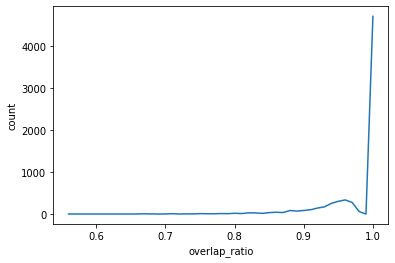

--------------- Dogri_DGONT
21692
7451
OrderedDict([(0.56, 1), (0.58, 1), (0.62, 1), (0.64, 1), (0.67, 5), (0.69, 2), (0.7, 1), (0.71, 2), (0.73, 3), (0.74, 3), (0.75, 7), (0.76, 7), (0.77, 9), (0.78, 5), (0.79, 5), (0.8, 11), (0.81, 6), (0.82, 12), (0.83, 31), (0.84, 13), (0.85, 23), (0.86, 32), (0.87, 18), (0.88, 88), (0.89, 58), (0.9, 75), (0.91, 59), (0.92, 107), (0.93, 156), (0.94, 240), (0.95, 300), (0.96, 367), (0.97, 369), (0.98, 68), (1.0, 5365)])

........ Analyzing overlap ratio .........



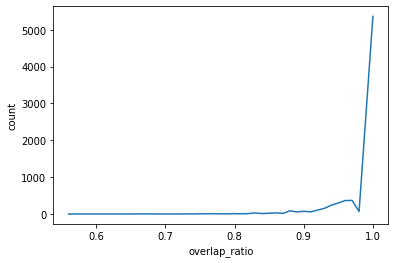

--------------- Mandeali_MJLNT
20301
6241
OrderedDict([(0.38, 1), (0.48, 1), (0.5, 1), (0.63, 1), (0.64, 1), (0.65, 1), (0.67, 4), (0.68, 1), (0.69, 2), (0.7, 1), (0.71, 6), (0.72, 2), (0.73, 5), (0.74, 2), (0.75, 8), (0.76, 2), (0.77, 5), (0.78, 10), (0.79, 9), (0.8, 20), (0.81, 17), (0.82, 21), (0.83, 43), (0.84, 16), (0.85, 48), (0.86, 55), (0.87, 37), (0.88, 81), (0.89, 98), (0.9, 141), (0.91, 103), (0.92, 191), (0.93, 219), (0.94, 281), (0.95, 335), (0.96, 361), (0.97, 307), (0.98, 51), (1.0, 3753)])

........ Analyzing overlap ratio .........



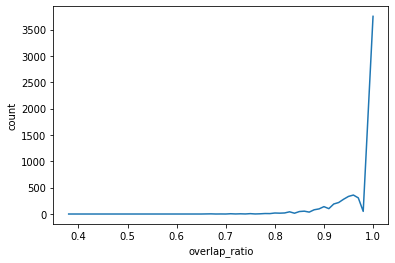

--------------- Baghlayani_BGHNT
19173
7279
OrderedDict([(0.38, 1), (0.52, 1), (0.53, 1), (0.58, 1), (0.6, 1), (0.62, 1), (0.64, 2), (0.67, 4), (0.7, 2), (0.71, 4), (0.73, 4), (0.74, 2), (0.75, 6), (0.76, 2), (0.77, 6), (0.78, 8), (0.79, 10), (0.8, 11), (0.81, 14), (0.82, 17), (0.83, 25), (0.84, 12), (0.85, 28), (0.86, 33), (0.87, 25), (0.88, 69), (0.89, 64), (0.9, 101), (0.91, 99), (0.92, 149), (0.93, 199), (0.94, 306), (0.95, 349), (0.96, 407), (0.97, 371), (0.98, 67), (1.0, 4877)])

........ Analyzing overlap ratio .........



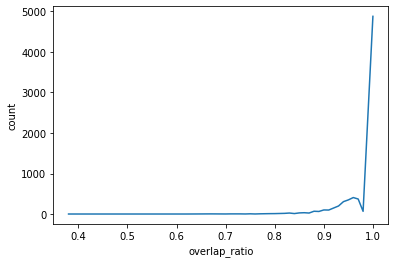

--------------- Chambeali_CDHNT
19657
5353
OrderedDict([(0.46, 1), (0.5, 1), (0.53, 1), (0.55, 1), (0.58, 1), (0.6, 1), (0.65, 3), (0.67, 6), (0.68, 1), (0.69, 4), (0.7, 6), (0.71, 6), (0.72, 1), (0.73, 7), (0.74, 1), (0.75, 11), (0.76, 8), (0.77, 9), (0.78, 18), (0.79, 16), (0.8, 21), (0.81, 22), (0.82, 32), (0.83, 46), (0.84, 34), (0.85, 41), (0.86, 78), (0.87, 48), (0.88, 115), (0.89, 117), (0.9, 140), (0.91, 118), (0.92, 173), (0.93, 216), (0.94, 285), (0.95, 315), (0.96, 312), (0.97, 266), (0.98, 44), (1.0, 2827)])

........ Analyzing overlap ratio .........



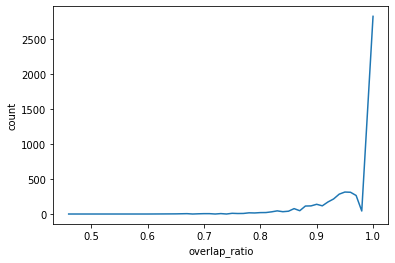

--------------- Gaddi_GBKNT
21296
6929
OrderedDict([(0.47, 2), (0.5, 3), (0.53, 1), (0.58, 1), (0.59, 1), (0.6, 3), (0.61, 1), (0.62, 1), (0.64, 1), (0.65, 2), (0.67, 6), (0.68, 1), (0.69, 2), (0.7, 3), (0.71, 13), (0.72, 1), (0.73, 7), (0.74, 6), (0.75, 13), (0.76, 8), (0.77, 5), (0.78, 15), (0.79, 15), (0.8, 17), (0.81, 24), (0.82, 35), (0.83, 42), (0.84, 19), (0.85, 60), (0.86, 60), (0.87, 49), (0.88, 95), (0.89, 106), (0.9, 118), (0.91, 129), (0.92, 210), (0.93, 219), (0.94, 312), (0.95, 377), (0.96, 403), (0.97, 392), (0.98, 64), (1.0, 4087)])

........ Analyzing overlap ratio .........



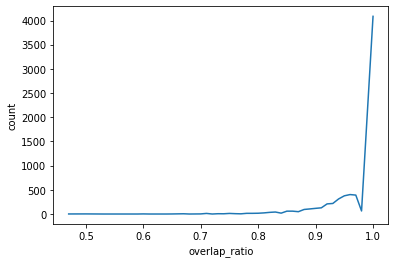

--------------- Bhadrawahi_BHDNT
30259
7414
OrderedDict([(0.19, 1), (0.23, 2), (0.25, 1), (0.33, 1), (0.41, 1), (0.42, 1), (0.44, 1), (0.45, 1), (0.46, 1), (0.47, 2), (0.5, 1), (0.52, 2), (0.54, 2), (0.55, 1), (0.56, 1), (0.57, 3), (0.58, 1), (0.59, 2), (0.6, 2), (0.61, 3), (0.62, 6), (0.64, 10), (0.65, 6), (0.67, 11), (0.68, 2), (0.69, 15), (0.7, 12), (0.71, 17), (0.72, 11), (0.73, 18), (0.74, 8), (0.75, 41), (0.76, 21), (0.77, 24), (0.78, 40), (0.79, 48), (0.8, 61), (0.81, 68), (0.82, 74), (0.83, 97), (0.84, 64), (0.85, 91), (0.86, 133), (0.87, 98), (0.88, 255), (0.89, 221), (0.9, 250), (0.91, 257), (0.92, 330), (0.93, 359), (0.94, 462), (0.95, 521), (0.96, 515), (0.97, 328), (0.98, 27), (0.99, 1), (1.0, 2882)])

........ Analyzing overlap ratio .........



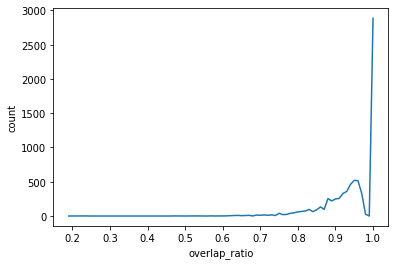

--------------- Bilaspuri_KFSNT
26365
7152
OrderedDict([(0.56, 2), (0.57, 1), (0.6, 1), (0.62, 1), (0.64, 2), (0.67, 5), (0.68, 2), (0.69, 6), (0.7, 3), (0.71, 14), (0.72, 4), (0.73, 6), (0.74, 4), (0.75, 15), (0.76, 8), (0.77, 7), (0.78, 13), (0.79, 27), (0.8, 34), (0.81, 30), (0.82, 40), (0.83, 50), (0.84, 30), (0.85, 48), (0.86, 84), (0.87, 65), (0.88, 156), (0.89, 150), (0.9, 172), (0.91, 174), (0.92, 215), (0.93, 290), (0.94, 387), (0.95, 432), (0.96, 445), (0.97, 371), (0.98, 67), (0.99, 1), (1.0, 3790)])

........ Analyzing overlap ratio .........



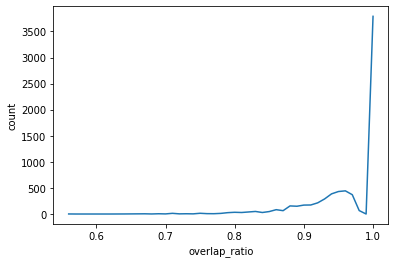

--------------- Kulvi_Outer_Seraji_OSJNT
23811
6924
OrderedDict([(0.5, 1), (0.53, 4), (0.54, 1), (0.55, 2), (0.57, 2), (0.58, 1), (0.59, 1), (0.6, 2), (0.61, 2), (0.62, 5), (0.64, 6), (0.66, 1), (0.67, 16), (0.68, 3), (0.69, 8), (0.7, 15), (0.71, 17), (0.72, 4), (0.73, 16), (0.74, 8), (0.75, 32), (0.76, 18), (0.77, 20), (0.78, 24), (0.79, 43), (0.8, 42), (0.81, 52), (0.82, 59), (0.83, 86), (0.84, 58), (0.85, 93), (0.86, 126), (0.87, 101), (0.88, 201), (0.89, 214), (0.9, 214), (0.91, 204), (0.92, 299), (0.93, 326), (0.94, 472), (0.95, 480), (0.96, 474), (0.97, 378), (0.98, 56), (1.0, 2737)])

........ Analyzing overlap ratio .........



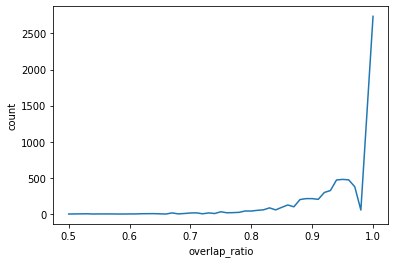

--------------- Kulvi_KFXNT
23442
6969
OrderedDict([(0.47, 1), (0.5, 1), (0.54, 1), (0.55, 1), (0.56, 1), (0.58, 1), (0.6, 2), (0.62, 4), (0.64, 2), (0.65, 2), (0.67, 6), (0.68, 2), (0.69, 3), (0.7, 6), (0.71, 12), (0.72, 4), (0.73, 8), (0.75, 21), (0.76, 12), (0.77, 10), (0.78, 14), (0.79, 21), (0.8, 35), (0.81, 31), (0.82, 35), (0.83, 60), (0.84, 26), (0.85, 56), (0.86, 76), (0.87, 52), (0.88, 157), (0.89, 138), (0.9, 160), (0.91, 161), (0.92, 257), (0.93, 271), (0.94, 381), (0.95, 426), (0.96, 455), (0.97, 393), (0.98, 60), (1.0, 3604)])

........ Analyzing overlap ratio .........



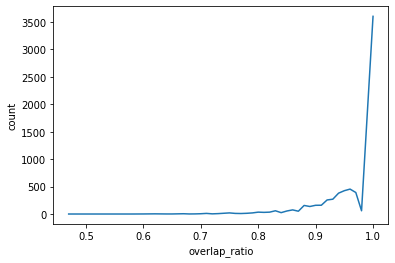

--------------- Pahari_Mahasui_BFZNT
25633
7522
OrderedDict([(0.5, 2), (0.53, 1), (0.54, 1), (0.55, 1), (0.6, 1), (0.62, 3), (0.64, 2), (0.65, 2), (0.67, 12), (0.68, 1), (0.69, 2), (0.7, 6), (0.71, 11), (0.72, 2), (0.73, 9), (0.74, 6), (0.75, 18), (0.76, 8), (0.77, 9), (0.78, 16), (0.79, 24), (0.8, 37), (0.81, 25), (0.82, 43), (0.83, 46), (0.84, 38), (0.85, 59), (0.86, 86), (0.87, 65), (0.88, 157), (0.89, 130), (0.9, 162), (0.91, 152), (0.92, 245), (0.93, 296), (0.94, 380), (0.95, 433), (0.96, 478), (0.97, 402), (0.98, 78), (1.0, 4073)])

........ Analyzing overlap ratio .........



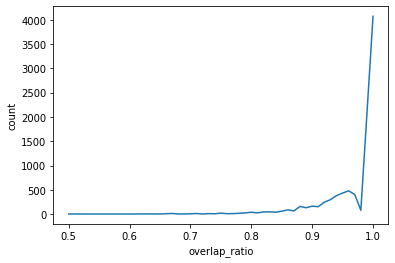

--------------- Kangri_XNRNT
19453
6876
OrderedDict([(0.53, 1), (0.56, 1), (0.61, 1), (0.62, 1), (0.64, 1), (0.67, 3), (0.69, 1), (0.7, 3), (0.71, 1), (0.72, 3), (0.73, 3), (0.74, 4), (0.75, 9), (0.76, 2), (0.77, 4), (0.78, 6), (0.79, 11), (0.8, 14), (0.81, 6), (0.82, 16), (0.83, 32), (0.84, 16), (0.85, 34), (0.86, 54), (0.87, 24), (0.88, 83), (0.89, 79), (0.9, 96), (0.91, 96), (0.92, 124), (0.93, 164), (0.94, 278), (0.95, 306), (0.96, 384), (0.97, 312), (0.98, 69), (0.99, 1), (1.0, 4633)])

........ Analyzing overlap ratio .........



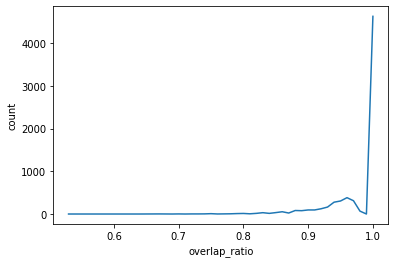

0:27:05.505202


In [8]:
'''Finds threshold value for overlaping alignments in correct verses'''
global target_lines
start_time = datetime.now()
min_langs = os.listdir(data_path)
thr_dic = {}
for min_lang in os.listdir(data_path):
    print("---------------", min_lang)
#     if min_lang in ['Haryanvi_BGCNT', 'Dogri_DGONT', 'Mandeali_MJLNT', 'Baghlayani_BGHNT', 'Chambeali_CDHNT', 'Gaddi_GBKNT', 'Bhadrawahi_BHDNT','Bilaspuri_KFSNT', 'Kulvi_Outer_Seraji_OSJNT', 'Kulvi_KFXNT', 'Pahari_Mahasui_BFZNT', 'Kangri_XNRNT']:
#         continue
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    source_lines = open(data_path + min_lang + '/verses.hi', 'r').readlines()
    target_lines = open(data_path + min_lang + '/verses.'+lang_code[lang_name], 'r').readlines()
    alignments_df = pd.read_csv(data_path + min_lang + '/aligned_words.csv')
    print(len(alignments_df))
    ratio_list = []
    print(len(source_lines))
    with ProcessPoolExecutor() as exe:
        result = exe.map(calculate_ratio_line, source_lines)
    ratio_list = []    
    for item in result:
        ratio_list.append(round(item, 2))   
    ratio_list_counter = Counter(ratio_list) 
    ratio_list_counter = OrderedDict(sorted(ratio_list_counter.items()))
    print(ratio_list_counter)
    plot_graph(ratio_list_counter, min_lang)
print(datetime.now() - start_time)     

In [16]:
overlap_thr = {"Haryanvi":0.8, "Dogri":0.83, "Mandeali":0.8, "Baghlayani":0.81, "Chambeali":0.75, "Gaddi":0.71, "Bhadrawahi":0.75, "Bilaspuri":0.79, 'Kulvi_Outer_Seraji':0.7, 'Kulvi':0.75, 'Pahari_Mahasui':0.71, 'Kangri': 0.79 }

### Filter wrong verse-alignments 

In [26]:
def write_wrong_alignments(dic):
    corpora_path = '/'.join(cwd.split('/')[:-2]) + '/corpora/'
    for min_lang in dic.keys():
        print("\n\n Language : ",min_lang)
        lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
        count = 0
        for book in dic[min_lang].keys():
#             print(book)
            file_path = corpora_path + book + '/' + min_lang + '/'
            os.system("rm "+file_path + book + '_' + lang_name + '_flagged.txt')
            fp = open(file_path + book + '_' + lang_name + '_wrong_alignments.txt', 'w')
            fp_s = open(file_path + book + '_' + 'hindi_wrong_alignments.txt', 'w')
            for line in dic[min_lang][book]:
                fp_s.write(line[0])
                fp.write(line[1])
                count += 1
            fp.close()
            fp_s.close()
        print("Wrong alignment count : ", count)  
        data_path = cwd+'/word_aligner/data/'+min_lang+'/'
        count_correct = len(open(data_path + 'verses.hi', 'r').readlines())
        count_to_be_checked = len(open(data_path + 'source_to_be_checked.txt', 'r').readlines())
        total_count =  count_correct + count_to_be_checked
        print("Total verses : ",total_count)

In [27]:
start = datetime.now()
data_dic = {}
for min_lang in os.listdir(data_path):
    print('>>>>>>>>', min_lang)
    lang_name = ('_'.join(min_lang.split('_')[:-1])).strip()
    temp = []
    wrong_alignments = defaultdict(list)
    source_lines = open(data_path + min_lang + '/source_to_be_checked.txt', 'r').readlines()
    target_lines = open(data_path + min_lang + '/target_to_be_checked.txt', 'r').readlines()
    alignments_df = pd.read_csv(data_path + min_lang + '/aligned_words.csv')
    print('Verses : ', len(source_lines))
    with ProcessPoolExecutor() as exe:
        result = exe.map(calculate_ratio_line, source_lines)
    print('overlap_threshold:', overlap_thr[lang_name])    
    for index,item in enumerate(result):
        temp.append(round(item, 1))
        if round(item, 2) < overlap_thr[lang_name]:
#             print("wrong.......", item)
            book = (source_lines[index].split('\t'))[0]
            line_ind = (source_lines[index].split('\t'))[1] + '\t' +(source_lines[index].split('\t'))[2]
            if book in wrong_alignments:
                wrong_alignments[book].append([source_lines[index], target_lines[index], item])
            else:
                wrong_alignments[book] = [[source_lines[index], target_lines[index], item]]   
    data_dic[min_lang] = wrong_alignments 
write_wrong_alignments(data_dic)
print(Counter(temp))
print(datetime.now() - start)    

>>>>>>>> Haryanvi_BGCNT
Verses :  1016
overlap_threshold: 0.8
>>>>>>>> Dogri_DGONT
Verses :  497
overlap_threshold: 0.83
>>>>>>>> Mandeali_MJLNT
Verses :  1652
overlap_threshold: 0.8
>>>>>>>> Baghlayani_BGHNT
Verses :  672
overlap_threshold: 0.81
>>>>>>>> Chambeali_CDHNT
Verses :  2523
overlap_threshold: 0.75
>>>>>>>> Gaddi_GBKNT
Verses :  1023
overlap_threshold: 0.71
>>>>>>>> Bhadrawahi_BHDNT
Verses :  521
overlap_threshold: 0.75
>>>>>>>> Bilaspuri_KFSNT
Verses :  784
overlap_threshold: 0.79
>>>>>>>> Kulvi_Outer_Seraji_OSJNT
Verses :  997
overlap_threshold: 0.7
>>>>>>>> Kulvi_KFXNT
Verses :  957
overlap_threshold: 0.75
>>>>>>>> Pahari_Mahasui_BFZNT
Verses :  414
overlap_threshold: 0.71
>>>>>>>> Kangri_XNRNT
Verses :  1057
overlap_threshold: 0.79


 Language :  Haryanvi_BGCNT
Wrong alignment count :  219
Total verses :  7916


 Language :  Dogri_DGONT
Wrong alignment count :  177
Total verses :  7948


 Language :  Mandeali_MJLNT
Wrong alignment count :  240
Total verses :  7893


 Lan